# Machine Learning: Supervised Classification

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import (confusion_matrix, precision_score,accuracy_score,
                            recall_score,mean_squared_error,roc_curve, auc)
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

We Use the Cumulative Database of Objects of Interest of the Kepler Exoplanet Observatory at https://exoplanetarchive.ipac.caltech.edu/docs/data.html

In this notebook we use several classifiers in order to reproduce de disposition of the observed object among the classes CONFIRMED and FALSE POSITIVE.

In [2]:
# Load the exoplanet database
data_url = "https://exoplanetarchive.ipac.caltech.edu/cgi-bin/nstedAPI/nph-nstedAPI?table=cumulative&select=kepid,kepoi_name,koi_disposition,koi_period,koi_time0bk,koi_impact,koi_duration,koi_depth,koi_prad,koi_sma,koi_teq,koi_insol,koi_model_snr,koi_steff,koi_slogg,koi_srad,koi_smass,ra,dec,koi_kepmag&format=csv"
df_kepler = pd.read_csv(data_url)

Drop All NaNs

In [3]:
df_kepler_clean=df_kepler.dropna().reset_index(drop=True)
df_kepler_clean

,kepid,kepoi_name,koi_disposition,koi_period,koi_time0bk,koi_impact,koi_duration,koi_depth,koi_prad,koi_sma,koi_teq,koi_insol,koi_model_snr,koi_steff,koi_slogg,koi_srad,koi_smass,ra,dec,koi_kepmag
0,10797460,K00752.01,CONFIRMED,9.488036,170.538750,0.146,2.95750,615.8,2.26,0.0853,793.0,93.59,35.8,5455.0,4.467,0.927,0.919,291.93423,48.141651,15.347
1,10797460,K00752.02,CONFIRMED,54.418383,162.513840,0.586,4.50700,874.8,2.83,0.2734,443.0,9.11,25.8,5455.0,4.467,0.927,0.919,291.93423,48.141651,15.347
2,10811496,K00753.01,CANDIDATE,19.899140,175.850252,0.969,1.78220,10829.0,14.60,0.1419,638.0,39.30,76.3,5853.0,4.544,0.868,0.961,297.00482,48.134129,15.436
3,10848459,K00754.01,FALSE POSITIVE,1.736952,170.307565,1.276,2.40641,8079.2,33.46,0.0267,1395.0,891.96,505.6,5805.0,4.564,0.791,0.836,285.53461,48.285210,15.597
4,10854555,K00755.01,CONFIRMED,2.525592,171.595550,0.701,1.65450,603.3,2.75,0.0374,1406.0,926.16,40.9,6031.0,4.438,1.046,1.095,288.75488,48.226200,15.509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9195,10090151,K07985.01,FALSE POSITIVE,0.527699,131.705093,1.252,3.22210,1579.2,29.35,0.0128,2088.0,4500.53,453.3,5638.0,4.529,0.903,1.005,297.18875,47.093819,14.082
9196,10128825,K07986.01,CANDIDATE,1.739849,133.001270,0.043,3.11400,48.5,0.72,0.0290,1608.0,1585.81,10.6,6119.0,4.444,1.031,1.075,286.50937,47.163219,14.757
9197,10147276,K07987.01,FALSE POSITIVE,0.681402,132.181750,0.147,0.86500,103.6,1.07,0.0157,2218.0,5713.41,12.3,6173.0,4.447,1.041,1.104,294.16489,47.176281,15.385
9198,10155286,K07988.01,CANDIDATE,333.486169,153.615010,0.214,3.19900,639.1,19.30,1.2233,557.0,22.68,14.0,4989.0,2.992,7.824,2.190,296.76288,47.145142,10.998


We keep only physical data of the observed object

In [4]:
df=df_kepler_clean.drop(['kepid', 'kepoi_name'], axis=1)

We take only information about the classes CONFIRMED and FALSE POSITIVE for the binary classification in order to obtain a model that can be used on the CANDIDATE class.

In [5]:
df=df[df['koi_disposition']!='CANDIDATE']

In [6]:
df['koi_disposition'].unique()

array(['CONFIRMED', 'FALSE POSITIVE'], dtype=object)

Encode the target variable

In [7]:
le=LabelEncoder()
df['koi_disposition']=le.fit_transform(df['koi_disposition'])

Identify the Independent and dependent variables and split into train and test sets

In [8]:
from sklearn.model_selection import train_test_split, cross_val_score

In [9]:
X=df.drop('koi_disposition',axis=1).values
y=df['koi_disposition'].values
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [10]:
scaler=StandardScaler()
X_train_scaled_1=scaler.fit_transform(X_train)
X_test_scaled_1=scaler.fit_transform(X_test)
X_scaled_1=scaler.fit_transform(X)

## Logistic Regression

In [70]:
lr=LogisticRegression()
lr.fit(X_train_scaled_1,y_train)

LogisticRegression()

Crossed Validation

In [12]:
scores_1=cross_val_score(lr,X_train_scaled_1,y_train)
print(f'Logistic Regression Score = {scores_1.mean()} +/- {scores_1.std()}')

Logistic Regression Score = 0.8460181021341462 +/- 0.006978522689133338


In [13]:
y_predict_1=lr.predict(X_test_scaled_1)

Confusion Matrix

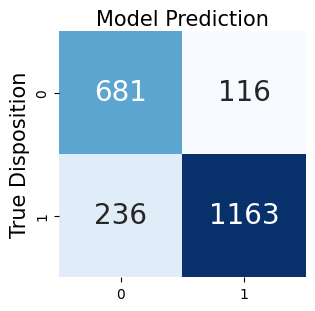

In [14]:
class_names=[0,0]
fig,ax=plt.subplots(figsize=(3,3))
tick_marks=(np.arange(len(class_names)))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)
sns.heatmap(pd.DataFrame(confusion_matrix(y_test,y_predict_1)),annot=True,
            cmap='Blues',fmt='g',cbar=False,
            annot_kws={'size':20})
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.ylabel('True Disposition', fontsize=15,y=0.5)
plt.xlabel('Model Prediction', fontsize=15)
plt.show()

Metrics

In [15]:
print(f'Precision: {precision_score(y_test,y_predict_1)}')
print(f'Accuracy: {accuracy_score(y_test,y_predict_1)}')
print(f'Recall: {recall_score(y_test,y_predict_1)}')

Precision: 0.9093041438623924
Accuracy: 0.8397085610200364
Recall: 0.8313080771979986


### ROC Curve

In [16]:
y_pred_prob_1=lr.predict_proba(X_test_scaled_1)
fpr,tpr,_=roc_curve(y_test,y_pred_prob_1[:,1])
roc_auc=auc(fpr,tpr)

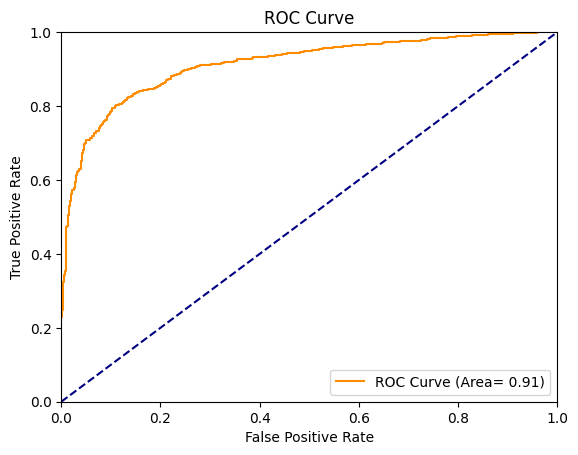

In [17]:
plt.figure()
plt.plot(fpr,tpr,color='darkorange', label='ROC Curve (Area= %0.2f)'% roc_auc)
plt.plot([0,1],[0,1], color='navy',linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

## Logistic Regression with Second Order Polinomial Fit

In [18]:
from sklearn.preprocessing import PolynomialFeatures

Preprocessing

In [19]:
poly_2=PolynomialFeatures(degree=2)
X_train_2=poly_2.fit_transform(X_train)
X_test_2=poly_2.fit_transform(X_test)
X_2=poly_2.fit_transform(X)

Scaling

In [20]:
X_train_scaled_2=scaler.fit_transform(X_train_2)
X_test_scaled_2=scaler.fit_transform(X_test_2)
X_scaled_2=scaler.fit_transform(X_2)

Logistic Regression

In [21]:
lr_2=LogisticRegression(max_iter=1000)
lr_2.fit(X_train_scaled_2,y_train)

LogisticRegression(max_iter=1000)

Crossed Validation

In [22]:
scores_2=cross_val_score(lr_2,X_train_scaled_2,y_train)
print(f'Logistic Regression Score = {scores_2.mean()} +/- {scores_2.std()}')

Logistic Regression Score = 0.8690493521341462 +/- 0.00786036165607074


In [23]:
y_predict_2=lr_2.predict(X_test_scaled_2)

Confusion Matrix

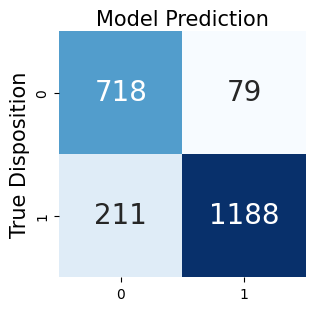

In [24]:
class_names=[0,0]
fig,ax=plt.subplots(figsize=(3,3))
tick_marks=(np.arange(len(class_names)))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)
sns.heatmap(pd.DataFrame(confusion_matrix(y_test,y_predict_2)),annot=True,
            cmap='Blues',fmt='g',cbar=False,
            annot_kws={'size':20})
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.ylabel('True Disposition', fontsize=15,y=0.5)
plt.xlabel('Model Prediction', fontsize=15)
plt.show()

Metrics

In [25]:
print(f'Precision: {precision_score(y_test,y_predict_2)}')
print(f'Accuracy: {accuracy_score(y_test,y_predict_2)}')
print(f'Recall: {recall_score(y_test,y_predict_2)}')

Precision: 0.9376479873717443
Accuracy: 0.8679417122040073
Recall: 0.8491779842744818


## Logistic Regression with Third Order Polinomial Fit

Preprocessing

In [26]:
poly_3=PolynomialFeatures(degree=3)
X_train_3=poly_3.fit_transform(X_train)
X_test_3=poly_3.fit_transform(X_test)
X_3=poly_3.fit_transform(X)

Scaling

In [27]:
X_train_scaled_3=scaler.fit_transform(X_train_3)
X_test_scaled_3=scaler.fit_transform(X_test_3)
X_scaled_3=scaler.fit_transform(X_3)

Logistic Regression

In [28]:
lr_3=LogisticRegression(max_iter=1000)
lr_3.fit(X_train_scaled_3,y_train)

LogisticRegression(max_iter=1000)

Crossed Validation

In [29]:
scores_3=cross_val_score(lr_3,X_train_scaled_3,y_train)
print(f'Logistic Regression Score = {scores_3.mean()} +/- {scores_3.std()}')

Logistic Regression Score = 0.883295731707317 +/- 0.008894084369052903


In [30]:
y_predict_3=lr_3.predict(X_test_scaled_3)

Confusion Matrix

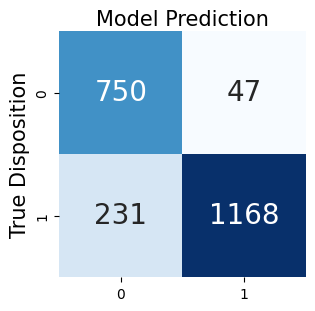

In [31]:
class_names=[0,0]
fig,ax=plt.subplots(figsize=(3,3))
tick_marks=(np.arange(len(class_names)))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)
sns.heatmap(pd.DataFrame(confusion_matrix(y_test,y_predict_3)),annot=True,
            cmap='Blues',fmt='g',cbar=False,
            annot_kws={'size':20})
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.ylabel('True Disposition', fontsize=15,y=0.5)
plt.xlabel('Model Prediction', fontsize=15)
plt.show()

Metrics

In [32]:
print(f'Precision: {precision_score(y_test,y_predict_3)}')
print(f'Accuracy: {accuracy_score(y_test,y_predict_3)}')
print(f'Recall: {recall_score(y_test,y_predict_3)}')

Precision: 0.9613168724279836
Accuracy: 0.8734061930783242
Recall: 0.8348820586132952


## Naïve Bayes Classifier

In [33]:
from sklearn.naive_bayes import GaussianNB

In [34]:
nb=GaussianNB()
nb.fit(X_train_scaled_1,y_train)

GaussianNB()

Crossed Validation

In [35]:
scores_nb=cross_val_score(nb,X_train_scaled_1,y_train)
print(f'Naïve Bayes Score = {scores_nb.mean()} +/- {scores_nb.std()}')

Naïve Bayes Score = 0.7505813643292683 +/- 0.014049026244166877


In [36]:
y_predict_nb=nb.predict(X_test_scaled_1)

Confusion Matrix

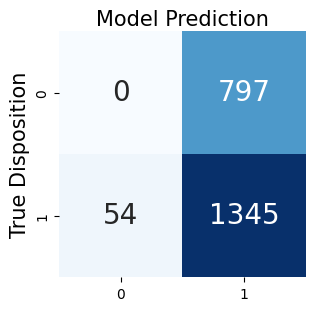

In [37]:
class_names=[0,0]
fig,ax=plt.subplots(figsize=(3,3))
tick_marks=(np.arange(len(class_names)))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)
sns.heatmap(pd.DataFrame(confusion_matrix(y_test,y_predict_nb)),annot=True,
            cmap='Blues',fmt='g',cbar=False,
            annot_kws={'size':20})
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.ylabel('True Disposition', fontsize=15,y=0.5)
plt.xlabel('Model Prediction', fontsize=15)
plt.show()

Metrics

In [38]:
print(f'Precision: {precision_score(y_test,y_predict_nb)}')
print(f'Accuracy: {accuracy_score(y_test,y_predict_nb)}')
print(f'Recall: {recall_score(y_test,y_predict_nb)}')

Precision: 0.6279178338001867
Accuracy: 0.6124772313296903
Recall: 0.9614010007147963


## Support Vector Machines

In [39]:
from sklearn.svm import SVC

In [40]:
sv=SVC()
sv.fit(X_train_scaled_1,y_train)

SVC()

Crossed Validation

In [41]:
scores_sv=cross_val_score(sv,X_train_scaled_1,y_train)
print(f'SVM Score = {scores_sv.mean()} +/- {scores_sv.std()}')

SVM Score = 0.8592909679878048 +/- 0.008993489689591143


In [42]:
y_predict_sv=sv.predict(X_test_scaled_1)

Confusion Matrix

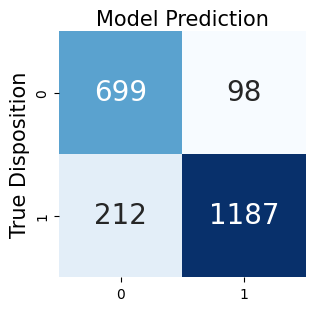

In [43]:
class_names=[0,0]
fig,ax=plt.subplots(figsize=(3,3))
tick_marks=(np.arange(len(class_names)))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)
sns.heatmap(pd.DataFrame(confusion_matrix(y_test,y_predict_sv)),annot=True,
            cmap='Blues',fmt='g',cbar=False,
            annot_kws={'size':20})
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.ylabel('True Disposition', fontsize=15,y=0.5)
plt.xlabel('Model Prediction', fontsize=15)
plt.show()

Metrics

In [44]:
print(f'Precision: {precision_score(y_test,y_predict_sv)}')
print(f'Accuracy: {accuracy_score(y_test,y_predict_sv)}')
print(f'Recall: {recall_score(y_test,y_predict_sv)}')

Precision: 0.9237354085603113
Accuracy: 0.8588342440801457
Recall: 0.8484631879914224


## Decision Tree

In [45]:
from sklearn.tree import DecisionTreeClassifier

In [46]:
dt=DecisionTreeClassifier()
dt.fit(X_train_scaled_1,y_train)

DecisionTreeClassifier()

Crossed Validation

In [47]:
scores_dt=cross_val_score(dt,X_train_scaled_1,y_train)
print(f'Decision Tree Score = {scores_dt.mean()} +/- {scores_dt.std()}')

Decision Tree Score = 0.866514100609756 +/- 0.012723969693748793


In [48]:
y_predict_dt=sv.predict(X_test_scaled_1)

Confusion Matrix

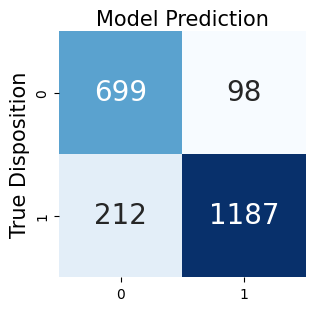

In [49]:
class_names=[0,0]
fig,ax=plt.subplots(figsize=(3,3))
tick_marks=(np.arange(len(class_names)))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)
sns.heatmap(pd.DataFrame(confusion_matrix(y_test,y_predict_dt)),annot=True,
            cmap='Blues',fmt='g',cbar=False,
            annot_kws={'size':20})
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.ylabel('True Disposition', fontsize=15,y=0.5)
plt.xlabel('Model Prediction', fontsize=15)
plt.show()

Metrics

In [50]:
print(f'Precision: {precision_score(y_test,y_predict_dt)}')
print(f'Accuracy: {accuracy_score(y_test,y_predict_dt)}')
print(f'Recall: {recall_score(y_test,y_predict_dt)}')

Precision: 0.9237354085603113
Accuracy: 0.8588342440801457
Recall: 0.8484631879914224


## Random Forest

In [51]:
from sklearn.ensemble import RandomForestClassifier

In [52]:
rf=RandomForestClassifier(n_estimators=1000,random_state=10)
rf.fit(X_train_scaled_1,y_train)

RandomForestClassifier(n_estimators=1000, random_state=10)

Crossed Validation

In [69]:
scores_rf=cross_val_score(rf,X_train_scaled_1,y_train)
print(f'Random Forest Score = {scores_rf.mean()} +/- {scores_rf.std()}')

Random Forest Score = 0.9184233993902439 +/- 0.006828555781714554


In [54]:
y_predict_rf=rf.predict(X_test_scaled_1)

Confusion Matrix

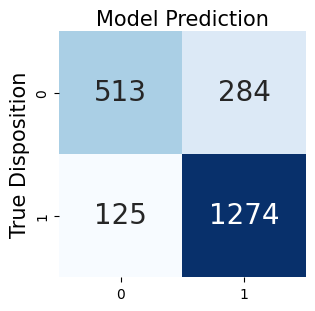

In [55]:
class_names=[0,0]
fig,ax=plt.subplots(figsize=(3,3))
tick_marks=(np.arange(len(class_names)))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)
sns.heatmap(pd.DataFrame(confusion_matrix(y_test,y_predict_rf)),annot=True,
            cmap='Blues',fmt='g',cbar=False,
            annot_kws={'size':20})
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.ylabel('True Disposition', fontsize=15,y=0.5)
plt.xlabel('Model Prediction', fontsize=15)
plt.show()

Metrics

In [56]:
print(f'Precision: {precision_score(y_test,y_predict_rf)}')
print(f'Accuracy: {accuracy_score(y_test,y_predict_rf)}')
print(f'Recall: {recall_score(y_test,y_predict_rf)}')

Precision: 0.8177150192554558
Accuracy: 0.813752276867031
Recall: 0.910650464617584


## Multi-layer Perceptron classifier

In [57]:
from sklearn.neural_network import MLPClassifier

In [58]:
mlp=MLPClassifier(hidden_layer_sizes=(16,8),
                  max_iter=20000,
                  activation='relu',
                  tol=1e-7)
mlp.fit(X_train_scaled_1,y_train)

MLPClassifier(hidden_layer_sizes=(16, 8), max_iter=20000, tol=1e-07)

Crossed Validation

In [59]:
scores_mlp=cross_val_score(mlp,X_train_scaled_1,y_train)
print(f'Multi-layer Perceptron Score = {scores_mlp.mean()} +/- {scores_mlp.std()}')

Decision Tree Score = 0.8914916158536584 +/- 0.006203127516924468


In [60]:
y_predict_mlp=mlp.predict(X_test_scaled_1)

Confusion Matrix

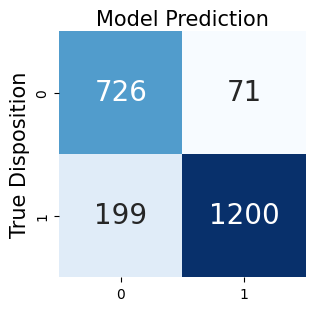

In [61]:
class_names=[0,0]
fig,ax=plt.subplots(figsize=(3,3))
tick_marks=(np.arange(len(class_names)))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)
sns.heatmap(pd.DataFrame(confusion_matrix(y_test,y_predict_mlp)),annot=True,
            cmap='Blues',fmt='g',cbar=False,
            annot_kws={'size':20})
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.ylabel('True Disposition', fontsize=15,y=0.5)
plt.xlabel('Model Prediction', fontsize=15)
plt.show()

Metrics

In [62]:
print(f'Precision: {precision_score(y_test,y_predict_mlp)}')
print(f'Accuracy: {accuracy_score(y_test,y_predict_mlp)}')
print(f'Recall: {recall_score(y_test,y_predict_mlp)}')

Precision: 0.9441384736428009
Accuracy: 0.8770491803278688
Recall: 0.8577555396711937


# Artificial Neural Network

Network Architecture

In [63]:
model=Sequential()
model.add(Dense(32,input_shape=(X_train_scaled_1.shape[1],),activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

Compile the Model

In [64]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

Train the Model

In [65]:
history=model.fit(X_train_scaled_1,y_train,epochs=100, verbose=True,
                  validation_split=0.1)

Epoch 1/100
145/145 [==============================] - 2s 4ms/step - loss: 0.5127 - accuracy: 0.7207 - val_loss: 0.4548 - val_accuracy: 0.7778
Epoch 2/100
145/145 [==============================] - 0s 3ms/step - loss: 0.3999 - accuracy: 0.8250 - val_loss: 0.3925 - val_accuracy: 0.8246
Epoch 3/100
145/145 [==============================] - 0s 2ms/step - loss: 0.3496 - accuracy: 0.8506 - val_loss: 0.3623 - val_accuracy: 0.8324
Epoch 4/100
145/145 [==============================] - 0s 3ms/step - loss: 0.3266 - accuracy: 0.8597 - val_loss: 0.3369 - val_accuracy: 0.8577
Epoch 5/100
145/145 [==============================] - 0s 3ms/step - loss: 0.3137 - accuracy: 0.8655 - val_loss: 0.3286 - val_accuracy: 0.8577
Epoch 6/100
145/145 [==============================] - 0s 3ms/step - loss: 0.3043 - accuracy: 0.8705 - val_loss: 0.3178 - val_accuracy: 0.8655
Epoch 7/100
145/145 [==============================] - 1s 4ms/step - loss: 0.2956 - accuracy: 0.8729 - val_loss: 0.3060 - val_accuracy: 0.8791

In [66]:
y_predict_model=model.predict(X_test_scaled_1)

69/69 [==============================] - 0s 1ms/step


Confusion Matrix

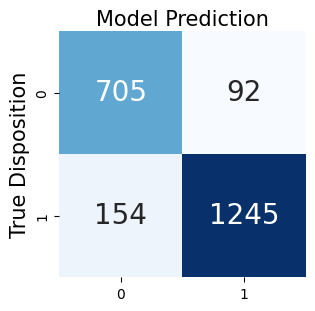

In [67]:
class_names=[0,0]
fig,ax=plt.subplots(figsize=(3,3))
tick_marks=(np.arange(len(class_names)))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)
sns.heatmap(pd.DataFrame(confusion_matrix(y_test,y_predict_model.round())),
            annot=True,cmap='Blues',fmt='g',cbar=False,
            annot_kws={'size':20})
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.ylabel('True Disposition', fontsize=15,y=0.5)
plt.xlabel('Model Prediction', fontsize=15)
plt.show()

Metrics

In [68]:
print(f'Precision: {precision_score(y_test,y_predict_model.round())}')
print(f'Accuracy: {accuracy_score(y_test,y_predict_model.round())}')
print(f'Recall: {recall_score(y_test,y_predict_model.round())}')

Precision: 0.931189229618549
Accuracy: 0.8879781420765027
Recall: 0.8899213724088635
